In [23]:
import numpy as np
from scipy.optimize import broyden1
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
#from sympy.solvers.solveset import nonlinsolve
#from sympy.core.symbol import symbols

In [5]:
def set_variables(old_pos_vel, t, g, m, k) :
    # t = tau
    # g = gamma
    # m = mass
    # k = kappa
    # old_pos_vel = position and velocity of the previous time step in an array 
    # Takes in the four above and initializes them in the Damped Harmonic
    # # Oscilator equation. Returns the function for conservative discretization
    # # of DHO.
    constant = (1 - np.exp(-1 * g / m * t)) / (g / m * t)
    old_x, old_y = old_pos_vel
    
    def DHO_function(pos_vel) :
        x, y  = pos_vel
        y_bar = (y + old_y) / 2
        x_bar = (x + old_x) / 2
        
        quantity1 = y * (m * (old_y + y_bar) / 2 + g * x / 2)
        quantity2 = k / 2 * (old_x * old_x - x * x_bar)
        quantity3 = m * y_bar + g * x / 2
        quantity4 = (g * quantity1 + quantity2) / quantity3
        
        final_quantity = (-1) / m * (quantity4 + k * x_bar)
        return np.array([x - old_x, y - old_y]) / t - constant * np.array([y_bar, final_quantity])
    
    return DHO_function

# Iteration using scipy broyden1
def next_iteration(pos_vel, t, g, m, k):
    # t = tau
    # g = gamma
    # m = mass
    # k = kappa
    # Returns the values of x and y (position and velocity) at time k+1
    
    x, y = pos_vel
    # Instantiate function. Initial guess for new position and velocity is previous 
    # # position and velocity.
    DHO_function = set_variables([x,y],t,g,m,k)
    return broyden1(DHO_function, [x,y])

# Iteration using sympy nonlinsolve
# def next_iteration(xk, yk, tau, gamma, mass, kappa) :
#     # Returns the values of x and y (position and velocity) at time k+1 
#     constant = (1 - np.exp(-1 * gamma / mass * tau)) / (gamma / mass * tau)
#     x, y = symbols('x, y', real=True)
#     solutions = nonlinsolve( [(x - xk)/tau - constant * (y + yk)/2,
#                               (y - yk)/tau + constant / mass * kappa * (x + xk)/2 +
#                                   constant * gamma / mass / (mass * (y + yk)/2 + gamma/2 * x) * 
#                                   (yk * (mass * (3 * yk + 2 * y)/4 + gamma/2 * xk) + 
#                                   kappa/2 * (xk ** 2 - x/2 * (x + xk))
#                               )], (x,y))
    
#     # nonlinsolve returns a set for some reason. Turn it into an array, and 
#     # # find the best solution, by finding which solution is the closest to 
#     # # the previous time point
#     solutions = np.array([sol for sol in solutions])
#     index = np.linalg.norm(solutions, axis=1, ord=1).argmin()
#     return solutions[index,:]

In [20]:
def DHO_solution(initial_conditions, endtime, tau, gamma, mass, kappa, 
            verbose=False) :
    # Gives the solution to the Damped Harmonic Oscilator.
    # # initial_conditions = (start_position, start_velocity)
    # # endtime = Run from time = 0 till time = endtime
    # # tau = time step size
    # # gamma = damping constant
    # # mass = mass
    # # kappa = spring coefficient
    N = np.int(np.floor(endtime / tau))
    solutions = np.zeros((N,2))
    solutions[0,:] = initial_conditions
    for it in range(1,N) :
        solutions[it,:] = next_iteration(solutions[it-1, :], tau, gamma, mass, kappa)
        if verbose :
            print("Iteration %d: position %f, velocity %f"%(it,solutions[it,0],
                                                           solutions[it,1]))
    
    return solutions
    
    

In [15]:
DHO_solutions = solution((1,0), 1000, 0.01, 0.5, 4, 5, verbose=True)

Iteration 1: position 0.999938, velocity -0.012478
Iteration 2: position 0.999751, velocity -0.024945
Iteration 3: position 0.999439, velocity -0.037404
Iteration 4: position 0.999003, velocity -0.049868
Iteration 5: position 0.998442, velocity -0.062437
Iteration 6: position 0.997817, velocity -0.062527
Iteration 7: position 0.997132, velocity -0.074685
Iteration 8: position 0.996324, velocity -0.086944
Iteration 9: position 0.995394, velocity -0.099202
Iteration 10: position 0.994341, velocity -0.111444
Iteration 11: position 0.993166, velocity -0.123663
Iteration 12: position 0.991870, velocity -0.135855
Iteration 13: position 0.990451, velocity -0.148018
Iteration 14: position 0.988911, velocity -0.160149
Iteration 15: position 0.987250, velocity -0.172247
Iteration 16: position 0.985469, velocity -0.184309
Iteration 17: position 0.983567, velocity -0.196334
Iteration 18: position 0.981545, velocity -0.208321
Iteration 19: position 0.979403, velocity -0.220267
Iteration 20: positio

Iteration 230: position -0.692812, velocity -0.538858
Iteration 231: position -0.698151, velocity -0.529521
Iteration 232: position -0.703396, velocity -0.520129
Iteration 233: position -0.708547, velocity -0.510684
Iteration 234: position -0.713603, velocity -0.501188
Iteration 235: position -0.718564, velocity -0.491641
Iteration 236: position -0.723429, velocity -0.482045
Iteration 237: position -0.728199, velocity -0.472400
Iteration 238: position -0.732871, velocity -0.462709
Iteration 239: position -0.737447, velocity -0.452973
Iteration 240: position -0.741925, velocity -0.443192
Iteration 241: position -0.746305, velocity -0.433368
Iteration 242: position -0.750587, velocity -0.423502
Iteration 243: position -0.754769, velocity -0.413596
Iteration 244: position -0.758853, velocity -0.403650
Iteration 245: position -0.762837, velocity -0.393667
Iteration 246: position -0.766721, velocity -0.383647
Iteration 247: position -0.770505, velocity -0.373592
Iteration 248: position -0.7

Iteration 446: position 0.143510, velocity 0.820909
Iteration 447: position 0.151700, velocity 0.818046
Iteration 448: position 0.159860, velocity 0.815084
Iteration 449: position 0.167991, velocity 0.812025
Iteration 450: position 0.176090, velocity 0.808868
Iteration 451: position 0.184157, velocity 0.805615
Iteration 452: position 0.192192, velocity 0.802265
Iteration 453: position 0.200192, velocity 0.798820
Iteration 454: position 0.208158, velocity 0.795279
Iteration 455: position 0.216087, velocity 0.791644
Iteration 456: position 0.223980, velocity 0.787915
Iteration 457: position 0.231835, velocity 0.784093
Iteration 458: position 0.239652, velocity 0.780177
Iteration 459: position 0.247429, velocity 0.776170
Iteration 460: position 0.255165, velocity 0.772070
Iteration 461: position 0.262860, velocity 0.767880
Iteration 462: position 0.270513, velocity 0.763599
Iteration 463: position 0.278122, velocity 0.759229
Iteration 464: position 0.285687, velocity 0.754769
Iteration 46

Iteration 667: position 0.309651, velocity -0.669473
Iteration 668: position 0.302946, velocity -0.672453
Iteration 669: position 0.296211, velocity -0.675345
Iteration 670: position 0.289448, velocity -0.678150
Iteration 671: position 0.282657, velocity -0.680867
Iteration 672: position 0.275839, velocity -0.683496
Iteration 673: position 0.268996, velocity -0.686036
Iteration 674: position 0.262128, velocity -0.688488
Iteration 675: position 0.255235, velocity -0.690851
Iteration 676: position 0.248320, velocity -0.693125
Iteration 677: position 0.241382, velocity -0.695310
Iteration 678: position 0.234423, velocity -0.697405
Iteration 679: position 0.227443, velocity -0.699412
Iteration 680: position 0.220444, velocity -0.701328
Iteration 681: position 0.213425, velocity -0.703155
Iteration 682: position 0.206390, velocity -0.704892
Iteration 683: position 0.199337, velocity -0.706540
Iteration 684: position 0.192268, velocity -0.708097
Iteration 685: position 0.185184, velocity -0.

Iteration 829: position -0.577529, velocity -0.130877
Iteration 830: position -0.578800, velocity -0.123509
Iteration 831: position -0.579998, velocity -0.116135
Iteration 832: position -0.581121, velocity -0.108755
Iteration 833: position -0.582171, velocity -0.101371
Iteration 834: position -0.583147, velocity -0.093983
Iteration 835: position -0.584050, velocity -0.086593
Iteration 836: position -0.584878, velocity -0.079200
Iteration 837: position -0.585633, velocity -0.071807
Iteration 838: position -0.586313, velocity -0.064414
Iteration 839: position -0.586920, velocity -0.057022
Iteration 840: position -0.587453, velocity -0.049632
Iteration 841: position -0.587912, velocity -0.042244
Iteration 842: position -0.588297, velocity -0.034860
Iteration 843: position -0.588609, velocity -0.027480
Iteration 844: position -0.588847, velocity -0.020105
Iteration 845: position -0.589011, velocity -0.012736
Iteration 846: position -0.589101, velocity -0.005373
Iteration 847: position -0.5

Iteration 1049: position 0.305235, velocity 0.450349
Iteration 1050: position 0.309714, velocity 0.445956
Iteration 1051: position 0.314148, velocity 0.441514
Iteration 1052: position 0.318538, velocity 0.437022
Iteration 1053: position 0.322883, velocity 0.432481
Iteration 1054: position 0.327182, velocity 0.427892
Iteration 1055: position 0.331436, velocity 0.423255
Iteration 1056: position 0.335642, velocity 0.418572
Iteration 1057: position 0.339802, velocity 0.413842
Iteration 1058: position 0.343914, velocity 0.409067
Iteration 1059: position 0.347978, velocity 0.404247
Iteration 1060: position 0.351993, velocity 0.399382
Iteration 1061: position 0.355960, velocity 0.394474
Iteration 1062: position 0.359878, velocity 0.389522
Iteration 1063: position 0.363745, velocity 0.384529
Iteration 1064: position 0.367563, velocity 0.379493
Iteration 1065: position 0.371330, velocity 0.374417
Iteration 1066: position 0.375047, velocity 0.369301
Iteration 1067: position 0.378712, velocity 0.

Iteration 1261: position 0.068454, velocity -0.506377
Iteration 1262: position 0.063393, velocity -0.506566
Iteration 1263: position 0.058330, velocity -0.506692
Iteration 1264: position 0.053265, velocity -0.506755
Iteration 1265: position 0.048201, velocity -0.506754
Iteration 1266: position 0.043137, velocity -0.506690
Iteration 1267: position 0.038074, velocity -0.506564
Iteration 1268: position 0.033012, velocity -0.506374
Iteration 1269: position 0.027953, velocity -0.506122
Iteration 1270: position 0.022897, velocity -0.505807
Iteration 1271: position 0.017844, velocity -0.505430
Iteration 1272: position 0.012795, velocity -0.504990
Iteration 1273: position 0.007750, velocity -0.504487
Iteration 1274: position 0.002712, velocity -0.503923
Iteration 1275: position -0.002321, velocity -0.503296
Iteration 1276: position -0.007348, velocity -0.502608
Iteration 1277: position -0.012367, velocity -0.501858
Iteration 1278: position -0.017378, velocity -0.501046
Iteration 1279: position

NoConvergence: [-0.41340905  0.02901515]

In [22]:
DHO_solutions = DHO_solution((1,0), 10, 0.01, 0.5, 4, 5)

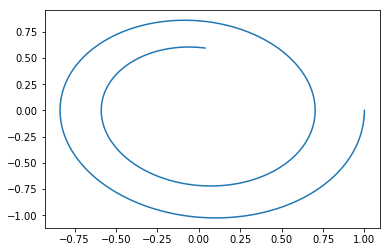

In [14]:
plt.plot(DHO_solutions[:,0], DHO_solutions[:,1])

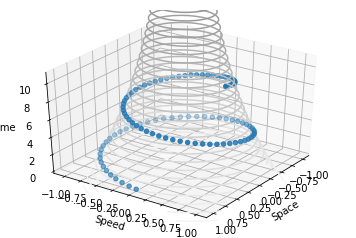

In [35]:
def find_constant(x,y,g,m,k) :
    # x, y are position and velocity, respectively, at time t=0. g,m,k are gamma,
    # # mass, kappa, respectively.
    return (m * y * y + g * x * y + k * x * x) / 2

DHO_constant = find_constant(DHO_solutions[0,0], DHO_solutions[0,1], 0.5, 4, 5)

def f(X, Y, g, m, k, constant=1.0) :
    return np.log( 2 * constant / (m * Y * Y + g * X * Y + k * X * X)) * m / g

x = np.linspace(-1,1,30)
y = np.linspace(-1,1,30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y, 0.5, 4, 5, constant = DHO_constant)

fig = plt.figure()
ax  = plt.axes(projection='3d')

ax.contour3D(X, Y, Z, 75, cmap='binary')
# ax.plot_wireframe(X, Y, Z, color='black')
ax.set_xlabel('Space')
ax.set_ylabel('Speed')
ax.set_zlabel('Time')
ax.set_zlim([0,11])

zdata = np.linspace(0,10,1000)
# ax.scatter3D(DHO_solutions[::10,0], DHO_solutions[::10,1], zdata[::10], c=zdata, cmap='Greens')
ax.scatter3D(DHO_solutions[::10,0], DHO_solutions[::10,1], zdata[::10], cmap='Greens')

ax.view_init(35,35)